In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

In [ ]:
# Load the training dataset(trn1.csv)
df = pd.read_csv('/content/trn1.csv')
print(df.head())

        x1      x2       x3       x4       x5       x6      x7       x8  class
0  42.0970  34.458  37.8980  34.7650  33.0900  34.8820  33.710  36.7950      4
1  -4.8691  -7.390  -2.6648  -7.0198  -2.6608  -7.6701 -10.579  -4.2273      5
2  11.1680  14.829  14.8510  17.2940  16.5920   9.2185   5.470  14.8440      6
3  34.9290  39.733  28.0890  38.2860  40.8610  43.4740  29.214  36.8120      4
4  42.3940  48.185  39.6120  44.1920  48.2870  47.9920  47.971  39.7930      1


In [ ]:
# Use describe function to generate statistics
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,class
count,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000,10800.000000
mean,7.084563,7.179412,7.181637,7.199799,7.075513,7.045094,7.140470,7.138420,4.490185
std,34.228444,34.057114,34.168760,34.108745,34.162329,34.229284,34.342103,34.059539,2.287733
min,-83.435000,-76.349000,-74.460000,-76.161000,-77.660000,-82.521000,-76.138000,-83.698000,1.000000
25%,-14.554000,-14.608750,-14.487750,-14.583500,-14.725250,-14.709500,-14.416250,-14.364000,3.000000
50%,5.729250,5.915550,5.969100,5.934150,6.163600,5.920300,5.867350,6.015700,4.000000
75%,36.776250,36.739500,36.912250,36.563500,36.770000,36.733250,36.769250,36.709000,6.000000
max,108.320000,104.140000,110.260000,110.370000,104.070000,111.980000,111.580000,105.010000,8.000000


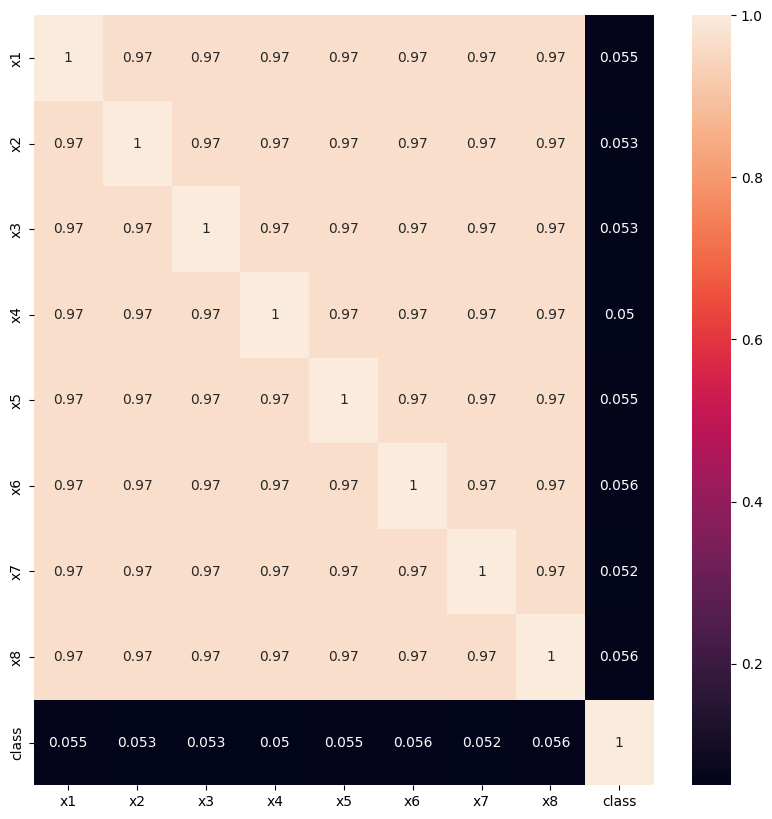

In [ ]:
# Plotting heatmap correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='class'>

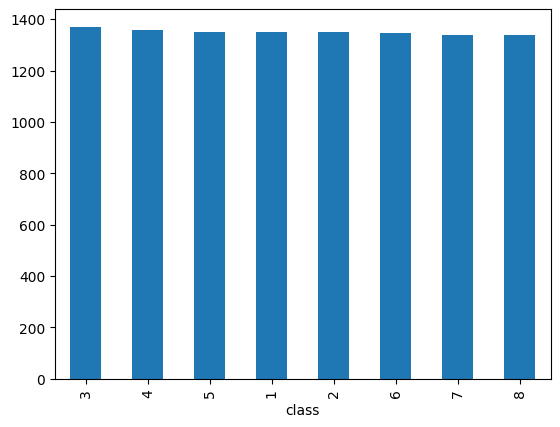

In [ ]:
# Value Count Plot for the Class Column
df['class'].value_counts().plot(kind='bar')

In [ ]:
# Handling Outliers by implementing the IQR (Interquartile Range)
Q1 = df.quantile(0.25)  # First quartile (25th percentile)
Q3 = df.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1           # Interquartile Range


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_cleaned = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

print("Before:", df.shape)
print("After:", df_cleaned.shape)

X = df_cleaned.drop('class', axis=1)
y = df_cleaned['class']

Before: (10800, 9)
After: (10800, 9)


In [ ]:
# Feature scaling by applying standardisation using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

print("Shape: ", X.shape, "Dimension: ", X.ndim)
print("Shape: ", y.shape, "Dimension: ", y.ndim)

Shape:  (10800, 8) Dimension:  2
Shape:  (10800,) Dimension:  1


In [ ]:
# Splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 42)

# Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Calculating the accuracy
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)
accuracy_score(y_test, predictions)

Training accuracy: 0.8792328042328043
Test accuracy: 0.8626543209876543


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8626543209876543

In [ ]:
# Calculating the Precision, Recall, and F1-Score metrics
precision = precision_score(y_test, predictions, average='weighted')
recall = recall_score(y_test, predictions, average='weighted')
f1 = f1_score(y_test, predictions, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.8744357067460534
Recall: 0.8626543209876543
F1-score: 0.8578315603892323


In [ ]:
# Calculating discriminant function
classes = np.unique(y_train)
priors = np.array([np.sum(y_train == class_label) / len(y_train) for class_label in classes])

# Mean and Covariance for each class
means = np.array([np.mean(X_train[y_train == class_label], axis=0) for class_label in classes])
covariances = np.array([np.cov(X_train[y_train == class_label], rowvar=False) for class_label in classes])

inv_covariances = np.array([np.linalg.inv(cov) for cov in covariances])
det_covariances = np.array([np.linalg.det(cov) for cov in covariances])

# Discriminant functions for each class
def discriminant_function(x, mean, cov_inv, det_cov, prior):
    return -0.5 * np.log(det_cov) - 0.5 * np.dot(np.dot((x - mean).T, cov_inv), (x - mean)) + np.log(prior)

# Printing discriminant functions for each class
for i, class_label in enumerate(classes):
    print(f"Discriminant function g_{class_label}(x):")
    print(f"g_{class_label}(x) = -0.5 * log(det_cov) - 0.5 * (x - mean)^T * inv(cov) * (x - mean) + log(prior)")
    print(f"Where: mean = {means[i]}, det_cov = {det_covariances[i]}, prior = {priors[i]}\n")

Discriminant function g_1(x):
g_1(x) = -0.5 * log(det_cov) - 0.5 * (x - mean)^T * inv(cov) * (x - mean) + log(prior)
Where: mean = [1.4989611  1.51018781 1.4961152  1.5102632  1.4956042  1.49073849
 1.50207908 1.48987238], det_cov = 5.313737731148616e-09, prior = 0.12473544973544974

Discriminant function g_2(x):
g_2(x) = -0.5 * log(det_cov) - 0.5 * (x - mean)^T * inv(cov) * (x - mean) + log(prior)
Where: mean = [-0.95805368 -0.95331049 -0.95190367 -0.94729186 -0.97174918 -0.97827098
 -0.95863242 -0.95553643], det_cov = 3.196584126082082e-07, prior = 0.12129629629629629

Discriminant function g_3(x):
g_3(x) = -0.5 * log(det_cov) - 0.5 * (x - mean)^T * inv(cov) * (x - mean) + log(prior)
Where: mean = [-1.57125155 -1.5799679  -1.57394393 -1.57661501 -1.57346749 -1.56485812
 -1.56451671 -1.57440877], det_cov = 1.438913044719067e-16, prior = 0.12791005291005292

Discriminant function g_4(x):
g_4(x) = -0.5 * log(det_cov) - 0.5 * (x - mean)^T * inv(cov) * (x - mean) + log(prior)
Where: mean 

In [ ]:
# Calculating Determinat of Covariance Matric for each class
for i, class_label in enumerate(classes):
    X_class = X_train[y_train == class_label]  # Get all samples for class i
    covariance_matrix = np.cov(X_class, rowvar=False)  # Covariance matrix for class i
    determinant_cov = np.linalg.det(covariance_matrix)  # Determinant of the covariance matrix


    print(f"Determinant of covariance matrix for class {class_label}: {determinant_cov}")

Determinant of covariance matrix for class 1: 5.313737731148616e-09
Determinant of covariance matrix for class 2: 3.196584126082082e-07
Determinant of covariance matrix for class 3: 1.438913044719067e-16
Determinant of covariance matrix for class 4: 3.002218169459221e-14
Determinant of covariance matrix for class 5: 3.2825694684163663e-18
Determinant of covariance matrix for class 6: 6.553949890903315e-18
Determinant of covariance matrix for class 7: 3.793052500607928e-15
Determinant of covariance matrix for class 8: 7.2250964996896e-15


In [ ]:
# Load testing dataset(tst1.csv)
test_df = pd.read_csv('/content/tst1.csv')
test_df.head()

,-8.9022,-12.822,-12.222,-13.842,-8.6976,-12.831,-1.2207,-16.622
0,-28.683,-35.293,-32.651,-8.3642,-23.4570,-23.4760,-31.6220,-19.7470
1,-13.128,-13.145,-13.819,-10.2240,-13.1960,-6.8505,-4.4794,-10.8940
2,-57.898,-54.094,-54.287,-59.8200,-56.7300,-52.8330,-53.2990,-50.7150
3,-15.707,-10.790,-12.795,-10.0030,-8.9882,-8.8820,-18.0390,-13.6810
4,-18.805,-23.600,-22.576,-8.5127,-17.9600,-2.5469,-5.6900,-6.4788


In [ ]:
# Since the testing dataset does not have headers, x1,x2...x8 headers a inserted
header_list = ['x' + str(i) for i in range(1, 9)]
test_df.columns = header_list
test = test_df.values

In [ ]:
# Make predictions with the testing data
test_predictions = model.predict(test)
test_predictions

array([3, 3, 3, ..., 1, 3, 1])

In [ ]:
# Store the predicted results in a dataframe
results_df = test_df.copy()
results_df['predicted_class'] = test_predictions
results_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,predicted_class
0,-28.683,-35.293,-32.651,-8.3642,-23.4570,-23.4760,-31.6220,-19.7470,3
1,-13.128,-13.145,-13.819,-10.2240,-13.1960,-6.8505,-4.4794,-10.8940,3
2,-57.898,-54.094,-54.287,-59.8200,-56.7300,-52.8330,-53.2990,-50.7150,3
3,-15.707,-10.790,-12.795,-10.0030,-8.9882,-8.8820,-18.0390,-13.6810,3
4,-18.805,-23.600,-22.576,-8.5127,-17.9600,-2.5469,-5.6900,-6.4788,3


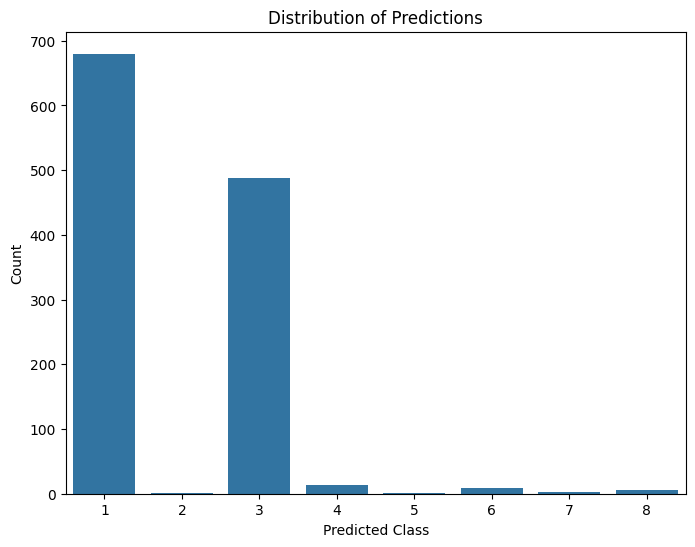

In [ ]:
# Plot the Value Count Plot of predicted class
plt.figure(figsize=(8, 6))
sns.countplot(x='predicted_class', data=results_df)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show()

In [ ]:
# remove column header from dataframe to be saved
results_df.columns = [''] * len(results_df.columns)
results_df.head()

,,,,,,,,,
0,-28.683,-35.293,-32.651,-8.3642,-23.4570,-23.4760,-31.6220,-19.7470,3
1,-13.128,-13.145,-13.819,-10.2240,-13.1960,-6.8505,-4.4794,-10.8940,3
2,-57.898,-54.094,-54.287,-59.8200,-56.7300,-52.8330,-53.2990,-50.7150,3
3,-15.707,-10.790,-12.795,-10.0030,-8.9882,-8.8820,-18.0390,-13.6810,3
4,-18.805,-23.600,-22.576,-8.5127,-17.9600,-2.5469,-5.6900,-6.4788,3


In [ ]:
# Exxport the dataframe into a csv file
results_df.to_csv('results1.csv', index=False, header=False)